In [21]:
%matplotlib inline

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.imports import *
from fastai.structured import *
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['data_description.txt', 'sample_submission.csv', 'sample_submission.csv.gz', 'test.csv', 'test.csv.gz', 'train.csv', 'train.csv.gz']


In [23]:
train_df = pd.read_csv(f'input/train.csv')
test_df = pd.read_csv(f'input/test.csv')

In [24]:
print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)


In [25]:
print(train_df.columns)
print(train_df.dtypes)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
train_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [27]:
train_cats(train_df)

In [28]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [29]:
SalePrice = np.log(train_df.SalePrice)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024, 10.76767, 11.07509, 11.38251, 11.68993, 11.99736, 12.30478, 12.6122 , 12.91963, 13.22705,
        13.53447]),
 <a list of 10 Patch objects>)

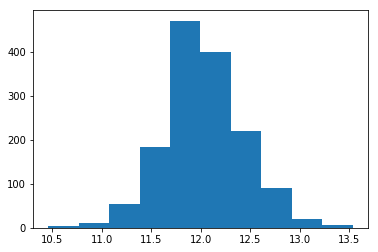

In [30]:
plt.hist(SalePrice)

In [31]:
train_df.drop(['Id'], axis=1, inplace=True)

In [32]:
df, y, nas, mapper = proc_df(train_df, 'SalePrice', do_scale=True)

In [38]:
#index = set(range(0,df.shape[0]))

#random.seed(200)

#train_index = random.sample(index, int(df.shape[0]*0.8))
#test_index = list(index - set(train_index))

train_index = int(df.shape[0]*0.8)

train = df.iloc[:train_index]
train_y = y[:train_index]
val = df.iloc[train_index:]
val_y = y[train_index:]

In [39]:
#1st RandomForest without any processing
rf_model = RandomForestRegressor(n_jobs=-1, oob_score=True, max_features='sqrt');
rf_model.fit(train, train_y);

/home/rk/miniconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [40]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())

In [41]:
print('Training RMSE: ', rmse(rf_model.predict(train), train_y))
print('Training R2: ', rf_model.score(train, train_y))
print('Validation RMSE: ', np.sqrt(np.mean((rf_model.predict(train) - train_y)**2)))
print('Validation R2: ', rf_model.score(val, val_y))

print('OOB Score: ', rf_model.oob_score_)

train_out = rf_model.predict(train)
print(np.mean((np.log(train_out) - np.log(train_y))**2))
val_out = rf_model.predict(val)
print(np.mean((np.log(val_out) - np.log(val_y))**2))

Training RMSE:  14176.390114006577
Training R2:  0.9676199252180008
Validation RMSE:  14176.390114006577
Validation R2:  0.7911020511262625
OOB Score:  0.6674189628368021
0.006176444389123831
0.025688654574297313


Its mostly straight but more can be done with this.

In [43]:
#1st RandomForest without any processing
rf_model = RandomForestRegressor(n_jobs=-1, oob_score=True, max_features='sqrt', n_estimators=40, min_samples_leaf=3)
rf_model.fit(train, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [44]:
print('Training RMSE: ', rmse(rf_model.predict(train), train_y))
print('Training R2: ', rf_model.score(train, train_y))
print('Validation RMSE: ', np.sqrt(np.mean((rf_model.predict(train) - train_y)**2)))
print('Validation R2: ', rf_model.score(val, val_y))

print('OOB Score: ', rf_model.oob_score_)

train_out = rf_model.predict(train)
print(np.mean((np.log(train_out) - np.log(train_y))**2))
val_out = rf_model.predict(val)
print(np.mean((np.log(val_out) - np.log(val_y))**2))

Training RMSE:  20010.465416327585
Training R2:  0.9354849682422934
Validation RMSE:  20010.465416327585
Validation R2:  0.7968375084334504
OOB Score:  0.8409125230109504
0.010298568453440226
0.023899232627088582


In [46]:
predictions = np.stack([trees.predict(train) for trees in rf_model.estimators_])

print(predictions.shape) # => there are 40 predictions as rows for 1168 observations (columns)
# Therefore we will compare the observations and mean of all the rows for each column..
print(np.mean(predictions[:,0]))

(40, 1168)
209126.8444999445


In [47]:
predictions[0]

array([217890.     , 168000.     , 227333.33333, ..., 224361.66667, 279850.     , 182360.     ])

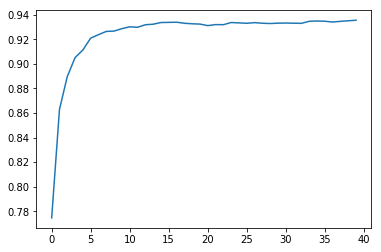

In [48]:
plt.plot([metrics.r2_score(train_y, np.mean(predictions[:i+1], axis=0)) for i in range(0,len(rf_model.estimators_))]);

In [49]:
#1st RandomForest without any processing
et_model = ExtraTreesRegressor(n_jobs=-1, oob_score=True, max_features=0.5, bootstrap=True, n_estimators=30, min_samples_leaf=3)
et_model.fit(train, train_y)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features=0.5, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=3, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
          oob_score=True, random_state=None, verbose=0, warm_start=False)

In [50]:
print(et_model.score(train, train_y))
print(et_model.score(val, val_y))
print(et_model.oob_score_)
train_out = et_model.predict(train)
print(np.mean((np.log(train_out) - np.log(train_y))**2))
val_out = et_model.predict(val)
print(np.mean((np.log(val_out) - np.log(val_y))**2))

0.9379620151056206
0.816528853368453
0.836088869835946
0.010008993777793494
0.023236414730857486


It seems the normal RF is giving much better result than this.

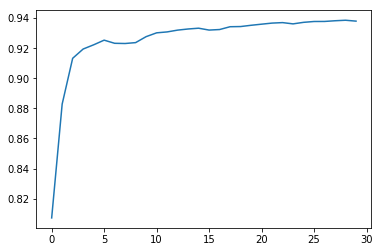

In [51]:
et_pred = np.stack([et.predict(train) for et in et_model.estimators_])
plt.plot([metrics.r2_score(train_y, np.mean(et_pred[:i+1], axis=0)) for i in range(0,len(et_model.estimators_))])

In [53]:
rf_imp = rf_feat_importance(rf_model, train)
et_imp = rf_feat_importance(et_model, train)

In [58]:
inc_cols = rf_imp[rf_imp.imp>0.002].cols
#print(et_imp[et_imp.imp>0.002].cols)

In [64]:
subset_train = train[inc_cols]
subset_val = val[inc_cols]

In [69]:
rf_model = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=40, max_features=0.5, min_samples_leaf=3)
rf_model.fit(subset_train, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [70]:
print('Training RMSE: ', rmse(rf_model.predict(subset_train), train_y))
print('Training R2: ', rf_model.score(subset_train, train_y))
print('Validation RMSE: ', np.sqrt(np.mean((rf_model.predict(subset_train) - train_y)**2)))
print('Validation R2: ', rf_model.score(subset_val, val_y))

print('OOB Score: ', rf_model.oob_score_)

train_out = rf_model.predict(subset_train)
print(np.mean((np.log(train_out) - np.log(train_y))**2))
val_out = rf_model.predict(subset_val)
print(np.mean((np.log(val_out) - np.log(val_y))**2))

Training RMSE:  16209.129064738678
Training R2:  0.957668281804491
Validation RMSE:  16209.129064738678
Validation R2:  0.8037041511739146
OOB Score:  0.8605788067946876
0.007099654367483471
0.023734322534187235


In [79]:
rf_imp = rf_feat_importance(rf_model, subset_train)
print(rf_imp)
print(rf_imp.shape)

             cols       imp
0     OverallQual  0.446880
1       GrLivArea  0.129700
4      GarageCars  0.066232
11      ExterQual  0.039672
7       YearBuilt  0.038340
3        1stFlrSF  0.034252
5     TotalBsmtSF  0.030368
13     BsmtFinSF1  0.026447
2      GarageArea  0.023879
17        LotArea  0.018612
12   YearRemodAdd  0.011608
20       2ndFlrSF  0.011238
9        FullBath  0.010511
14   TotRmsAbvGrd  0.009835
41         MoSold  0.009643
15     Fireplaces  0.008652
8     KitchenQual  0.007598
16     MasVnrArea  0.007305
19    LotFrontage  0.006258
18    OpenPorchSF  0.005719
21   Neighborhood  0.005705
26       BsmtQual  0.005649
6     GarageYrBlt  0.005330
27      BsmtUnfSF  0.004680
10    FireplaceQu  0.004580
25     WoodDeckSF  0.004509
38    OverallCond  0.003518
44    Exterior2nd  0.002333
36     CentralAir  0.002229
35     GarageType  0.002094
32   BedroomAbvGr  0.002027
31     MSSubClass  0.002009
33       MSZoning  0.001619
39   BsmtFinType1  0.001488
40    Exterior1st  0

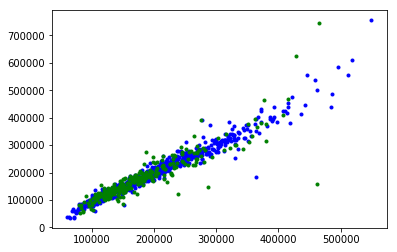

In [72]:
plt.plot(rf_model.predict(subset_train), train_y, 'b.');
plt.plot(rf_model.predict(subset_val), val_y, 'g.');

In [74]:
predictions = np.stack([trees.predict(subset_train) for trees in rf_model.estimators_])

print(predictions.shape) # => there are 40 predictions as rows for 1168 observations (columns)
# Therefore we will compare the observations and mean of all the rows for each column..
print(np.mean(predictions[:,0]))

(40, 1168)
202472.9501984127


In [75]:
predictions[0]

array([221833.33333, 134916.66667, 221833.33333, ..., 192333.33333, 233332.85714, 175055.     ])

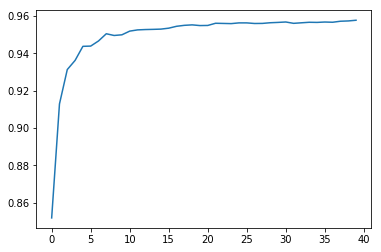

In [76]:
plt.plot([metrics.r2_score(train_y, np.mean(predictions[:i+1], axis=0)) for i in range(0,len(rf_model.estimators_))]);

In [35]:
test_df.shape

(1459, 80)

In [36]:
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [37]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [38]:
Id = test_df.Id
test_df.drop('Id', axis=1, inplace=True)

In [39]:
train_cats(test_df)

In [40]:
test, _, _, _ = proc_df(test_df, y_fld=None, na_dict=nas, do_scale=True, mapper=mapper)

In [41]:
SalePrice_rf = rf_model.predict(test)
SalePrice_et = et_model.predict(test)

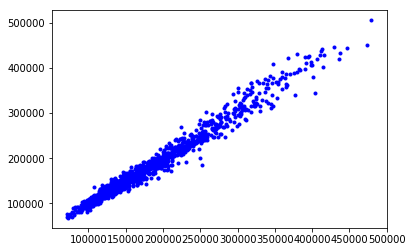

In [42]:
plt.plot(SalePrice_rf, SalePrice_et, 'b.');

In [43]:
result = {'Id':Id, 'SalePrice': (SalePrice_et+SalePrice_rf)/2}
out = pd.DataFrame(data=result)

In [44]:
out

,Id,SalePrice
0,1461,126350.751462
1,1462,151656.411036
2,1463,179826.019713
3,1464,186306.167609
4,1465,196783.241839
5,1466,184571.643342
6,1467,171166.162898
7,1468,173798.818505
8,1469,182678.520680
9,1470,125902.908697


In [ ]:
out.to_csv('output.csv', sep=',',index=False)